##  k-Means clustering

- **Q2. f.** best number of the clusters with the help of ${k-Means}$ ${clustering}$ is **3**
- **Q2. h.** ${Silhouette}$ ${score}$ of the ${k-Means}$ model is **0.4771**, based on ${elbow}$ method.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris_df = pd.read_csv('iris.csv')

In [3]:
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


#### As the target variables are the categorical, we are going to apply label encoder to convert the categorical feature into numerical feature.

In [4]:
lbl = LabelEncoder()

In [5]:
iris_df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

#### As there are three classes, the resulting classes will be labeled as [0,1,2]

In [6]:
iris_df['variety'] = lbl.fit_transform(iris_df['variety'])

In [7]:
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
scaler = StandardScaler()

In [9]:
iris_scaled_df = scaler.fit_transform(iris_df)

###  Q2. f. 

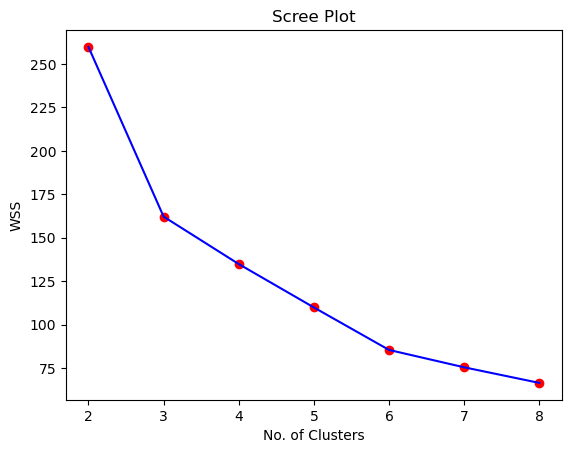

In [14]:
clust = [2,3,4,5,6,7,8]
scores = []
for i in clust:
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(iris_scaled_df)
    scores.append(km.inertia_)
    
plt.scatter(clust, scores, c='red')
plt.plot(clust, scores, c="blue")
plt.title("Scree Plot")
plt.xlabel("No. of Clusters")
plt.ylabel("WSS")
plt.show()

#### Using elbow method it can be deciphered that, optimum number of the cluster for the k-Means clustering is  ' 3'.

### Q2. g

### Building k-Means model using best number of cluster from above (i.e., n_clusters = 3)

In [46]:
km_clustering = KMeans(n_clusters=3, random_state=23)
km_clustering.fit(iris_scaled_df)

KMeans(n_clusters=3, random_state=23)

###  Q2. h

### Silhouette score for above model

In [47]:
# Silhouette score for the k-Means clustering, according to elbow method
print(f"Silhouette score for the n_clusters : 3 is  = ",silhouette_score(iris_scaled_df,km_clustering.labels_))

Silhouette score for the n_clusters : 3 is  =  0.477178745137644


 - Silhouette score for the clustering with 6 clusters is 0.38, which is below average.

#### finding best model with the help of silhouette score

In [41]:
clust = [2,3,4,5,6,7,8]
scores = []
for i in clust:
    km = KMeans(n_clusters=i, random_state=23)
    km.fit(iris_scaled_df)
    score = silhouette_score(iris_scaled_df,km.labels_)
    scores.append((score,i))

In [42]:
max(scores)

(0.5914563307927483, 2)

In [43]:
print(f"best Silhouette score= ",max(scores)[0])

best Silhouette score=  0.5914563307927483


In [44]:
# Silhouette score has improved to 0.59 (best silhouette score)

In [45]:
print(f"best number of clusters based on silhouette score = ",max(scores)[1])

best number of clusters based on silhouette score =  2
